In [4]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import threshold_sauvola
from skimage import img_as_ubyte

# A command line argument.
input_name = "C:/Users/dartix/PycharmProjects/kiv-zvi/SP/data_katastr/UAZK-B2-a-04-C-1425-002.JPG"





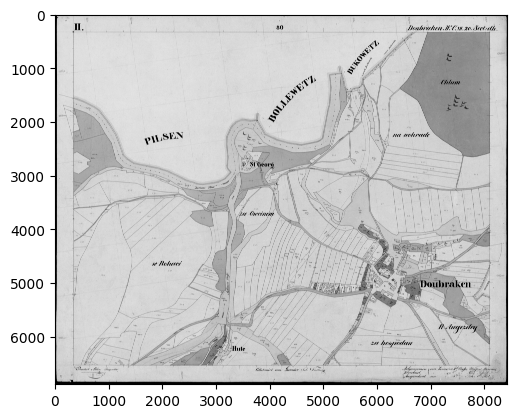

In [5]:
# It reads the image from the file.
img = cv2.cvtColor((cv2.imread(input_name,  cv2.COLOR_BGR2RGB)),  cv2.COLOR_BGR2RGB)

assert img is not None, "file could not be read, check with os.path.exists()"
# A Canny edge detector.
# img = cv2.Canny(img, 1, 500)
# Creating the kernel(2d convolution matrix)
kernel1 = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])
  
img = img[:,:,0]

plt.imshow(img, cmap="gray")

In [6]:
img = (cv2.imread(input_name, cv2.IMREAD_GRAYSCALE))
assert img is not None, "file could not be read, check with os.path.exists()"


In [138]:

# ret, thresh1 = cv2.threshold(img,100,155,cv2.THRESH_OTSU)

# plt.imshow(thresh1, cmap="gray")
# img = thresh1

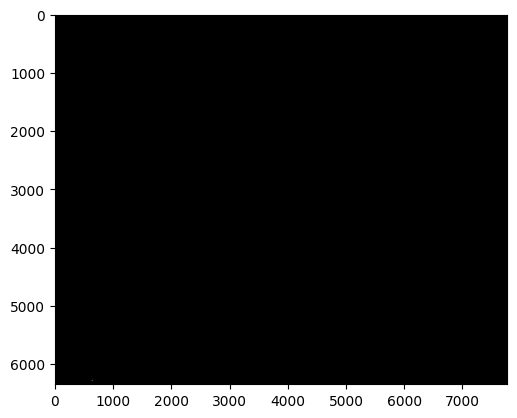

In [165]:
sauvola = (cv2.imread(input_name, cv2.IMREAD_GRAYSCALE))
assert img is not None, "file could not be read, check with os.path.exists()"
sauvola = threshold_sauvola(img, window_size=5, k=0.1)

plt.imshow(sauvola, cmap="gray")
img = sauvola

In [150]:
def get_sizes_procentual(procentual: float):
    # Taking the right xx% of the image.
    right_border = int(img.shape[1] * procentual)
    # Taking the left xx% of the image.
    left_border = int(img.shape[1] * (1 - procentual))
    # Taking the bottom xx% of the image.
    bottom_border = int(img.shape[0] * procentual)
    # Taking the top xx% of the image.
    top_border = int(img.shape[0] * (1 - procentual))
    return right_border, left_border, bottom_border, top_border

In [151]:
right_border, left_border, bottom_border, top_border = get_sizes_procentual(0.01)
print(bottom_border, top_border, right_border, left_border)
print(img.shape)
img = img[bottom_border:top_border, right_border:left_border]


64 6413 79 7847
(6478, 7927)


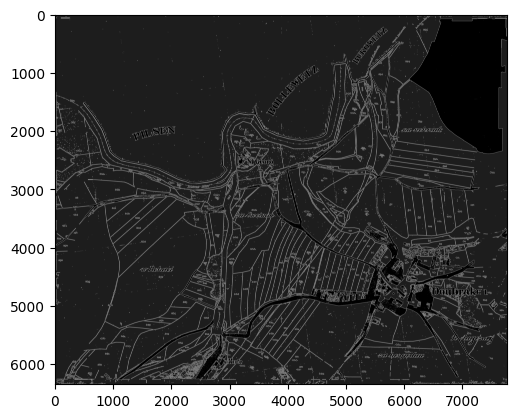

In [152]:
plt.imshow(img, cmap='gray')

In [153]:
# Taking the right 90% of the image.
right_border = int(img.shape[1] * 0.9)
# Taking the left 10% of the image.
left_border = int(img.shape[1] * 0.1)
# Taking the bottom 90% of the image.
bottom_border = int(img.shape[0] * 0.9)
# Taking the top 10% of the image.
top_border = int(img.shape[0] * 0.1)

# Taking the right, left, bottom and top border of the image.
right_border = img[:, right_border:]
left_border = img[:, :left_border]
bottom_border = img[bottom_border:, :]
top_border = img[:top_border, :]
print(top_border.shape)
# top_border = top_border.astype(int)
# top_border = img_as_ubyte(top_border)
print(top_border[:5])

(634, 7768)
[[15.5        15.5        15.5        ... 64.87593371 57.55754517
  46.97570036]
 [15.5        15.5        15.5        ... 64.28433627 56.51104502
  45.66845463]
 [15.5        15.5        15.5        ... 63.62977386 55.42726201
  44.34180961]
 [15.5        15.5        15.5        ... 61.32266265 51.97419104
  40.26305075]
 [15.5        15.5        15.5        ... 58.56443745 48.26174882
  36.0721545 ]]


In [154]:
def euclidean_2D(x1, x2, y1, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

def get_vertical(x1, x2, y1, y2, theta=0.1, min_value=20):
    """
    computes if is line vertical or horisontal like by parameters theta as and min_value
    """

    if np.square(x1 - x2) < theta and np.square(y1 - y2) > min_value:
        return True
    elif np.square(x1 - x2) > min_value and np.square(y1 - y2) < theta:
        return False

    




def make_line_detection(border, horisontal_only=False, vertical_only=False):
    # Create default parametrization LSD
    lsd = cv2.createLineSegmentDetector(0)

    # Detect lines in the image
    lines = lsd.detect(border)[0]  # Position 0 of the returned tuple are the detected lines
    lines = np.squeeze(lines)

    
    directions = np.array([get_vertical(i[0], i[2], i[1], i[3], 0.1, 20)  for i in lines])
    vertical = lines[directions == False,:]
    print("vertical", vertical.shape)
    horisontal = lines[directions == True,:]
    print("horisontal", horisontal.shape)

    if horisontal_only:
        lines = horisontal

    elif vertical_only:
        lines = vertical


    print(lines.shape)
    distances = np.array([euclidean_2D(i[0], i[2], i[1], i[3],)  for i in lines])
    print("distances.shape", distances.shape)

    print(distances.shape)
    plt.plot(np.arange(0, len(distances)), distances)
    plt.show()
    longest_lines = lines[distances > np.percentile(distances, 90)]
    print("longest_lines.shape", longest_lines.shape)

    longest_lines = longest_lines.astype(int)
    print(longest_lines)

    # Draw detected lines in the image
    for i in longest_lines:
        border = cv2.line(border, (i[0], i[1]), (i[2], i[3]), (255,0,0))
    print(border.shape)
    # It converts the image from BGR to grayscale.
    # drawn_img = cv2.cvtColor(white, cv2.COLOR_BGR2GRAY)
    plt.imshow(border, cmap='gray')
    # return border

In [155]:
make_line_detection(right_border, vertical_only=True)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\lsd.cpp:422: error: (-215:Assertion failed) !image.empty() && image.type() == CV_8UC1 in function 'cv::LineSegmentDetectorImpl::detect'


vertical (57, 4)
horisontal (72, 4)
(57, 4)
distances.shape (57,)
(57,)


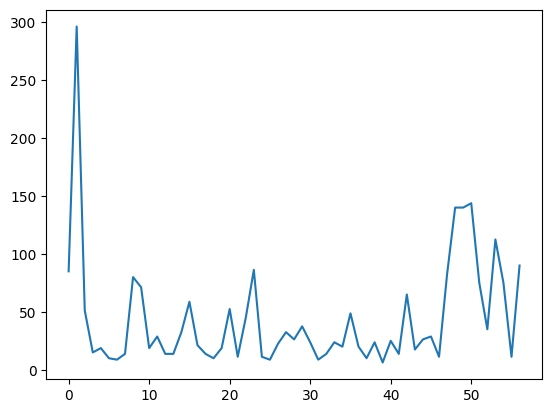

longest_lines.shape (6, 4)
[[ 709 6330  413 6330]
 [ 320  133  180  133]
 [ 180  134  320  134]
 [ 324  129  180  129]
 [ 511 6332  624 6332]
 [ 414 6332  504 6332]]
(6478, 792)


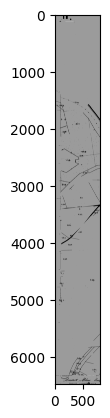

In [ ]:
make_line_detection(left_border, vertical_only=True)

vertical (35, 4)
horisontal (36, 4)
(36, 4)
distances.shape (36,)
(36,)


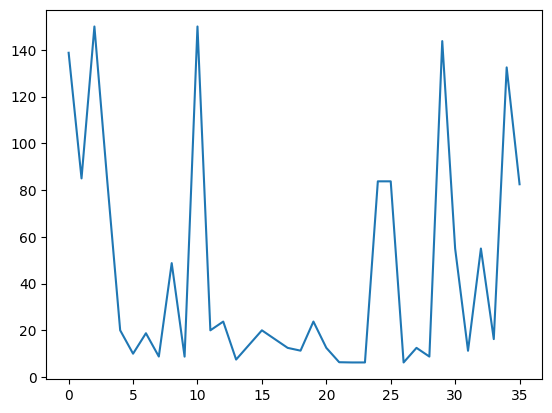

longest_lines.shape (4, 4)
[[7822  308 7822  446]
 [7810  154 7810  304]
 [7735  495 7735  645]
 [7812  298 7812  154]]
(647, 7927)


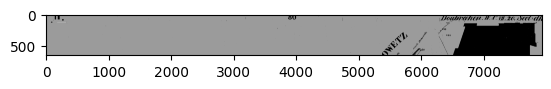

In [ ]:
make_line_detection(top_border, horisontal_only=True)

vertical (148, 4)
horisontal (83, 4)
(83, 4)
distances.shape (83,)
(83,)


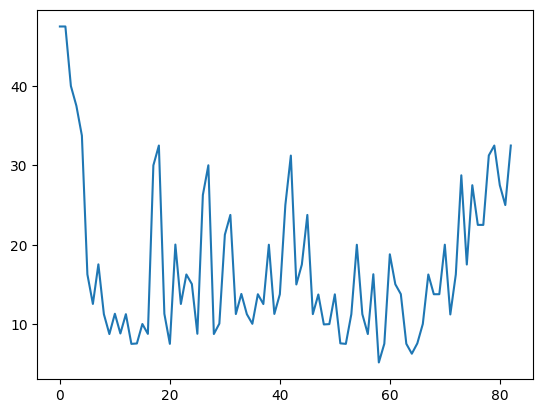

longest_lines.shape (9, 4)
[[3152  179 3152  226]
 [3056  201 3056  154]
 [3227  186 3226  226]
 [4740  523 4740  560]
 [ 713  504  713  538]
 [3187  576 3187  544]
 [ 709  504  709  535]
 [ 715  536  715  504]
 [4742  556 4742  524]]
(648, 7927)


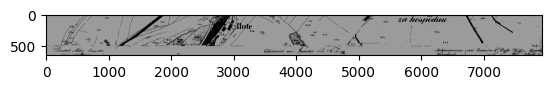

In [ ]:
make_line_detection(bottom_border, horisontal_only=True)
